In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
#from minepy import MINE

In [2]:
pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187102 sha256=18a095ae486aa29b0b2acd77b16b4b8ec3cf81b110a0c4918fc0b5d0698d0135
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [4]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'Cust_ID,Buy_product,Name,Newsletter_Subscription,Year_Birth,Membership,Preferred_Game_Genre,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,S4_GameLength,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation\r\n1,0,Ms. Nicole Clarke,yes,1974.0,Premium,Strategy,4907,3,4,1,4,4,3,4,3,3,3,3,4,3,4\r\n2,1,Mr. Jesse Scott,yes,1965.0,Premium,Strategy,6724,1,1,1,1,5,3,4,5,5,5,5,1,5,2\r\n3,0,Mr. Christopher Carter,yes,1973.0,Premium,Strategy,4365,3,3,3,3,1,4,4,3,3,2,3,2,3,1\r\n4,1,Ms. Jennifer Morgan,yes,1993.0,Non-Premium,Party,3849,1,1,1,1,4,4,5,4,4,4,4,4,4,3\r\n5,1,Mr. Michael White,yes,1989.0,Premium,Strategy,5376,2,2,3,2,5,5,5,5,5,3,4,1,3,5\r\n6,0,Ms. Morgan Briggs,yes,1975.0,Premium,Party,5342,2,2,5,5,3,2,2,2,2,2,2,4,2,1\r\n7,0,Ms. Kellie Alvarez,no,1990.0,Premium,Party,4909,2,2,2,3,2,2,2,2,1,1,2,2,3,2\r\n8,0,Mr. Jorge Brown,ye

In [6]:
train = pd.read_csv(r'/content/train.csv')
train

Cust_ID  Buy_product                    Name Newsletter_Subscription  \
0            1            0       Ms. Nicole Clarke                     yes   
1            2            1         Mr. Jesse Scott                     yes   
2            3            0  Mr. Christopher Carter                     yes   
3            4            1     Ms. Jennifer Morgan                     yes   
4            5            1       Mr. Michael White                     yes   
...        ...          ...                     ...                     ...   
15584    15585            0       Ms. Wendy Roberts                      no   
15585    15586            0         Ms. Sonya Smith                      no   
15586    15587            1      Mr. Maxwell Wright                     yes   
15587    15588            1       Mr. Gregory Moran                     yes   
15588    15589            0       Mr. Steven Mendez                     yes   

       Year_Birth   Membership Preferred_Game_Genre  FidelityPoints  \
0          1974.0      Premium             Strategy            4907   
1          1965.0      Premium             Strategy            6724   
2          1973.0      Premium             Strategy            4365   
3          1993.0  Non-Premium                Party            3849   
4          1989.0      Premium             Strategy            5376   
...           ...          ...                  ...             ...   
15584      1988.0      Premium                Party            4968   
15585      2000.0      Premium                Party            4970   
15586      1964.0      Premium             Strategy            4046   
15587      1992.0  Non-Premium                Party            5155   
15588      1983.0      Premium             Thematic            5136   

       S1_GameplayExperience  S2_GameMechanics  ...  S5_MaterialQuality  \
0                          3                 4  ...                   4   
1                          1                 1  ...                   5   
2                          3                 3  ...                   1   
3                          1                 1  ...                   4   
4                          2                 2  ...                   5   
...                      ...               ...  ...                 ...   
15584                      2                 0  ...                   3   
15585                      3                 3  ...                   5   
15586                      1                 1  ...                   3   
15587                      4                 3  ...                   5   
15588                      3                 3  ...                   3   

       S6_ValueForPrice  S7_Artwork_Design  S8_ThemeIntegration  \
0                     3                  4                    3   
1                     3                  4                    5   
2                     4                  4                    3   
3                     4                  5                    4   
4                     5                  5                    5   
...                 ...                ...                  ...   
15584                 2                  4                    3   
15585                 3                  5                    5   
15586                 4                  5                    4   
15587                 4                  5                    5   
15588                 3                  3                    3   

       S9_PlayerIteration  S10_LevelAdjust  S11_RuleClarity  \
0                       3                3                3   
1                       5                5                5   
2                       3                2                3   
3                       4                4                4   
4                       5                3                4   
...                   ...              ...              ...   
15584                   4                5                

In [7]:
train[train.duplicated()]

Empty DataFrame
Columns: [Cust_ID, Buy_product, Name, Newsletter_Subscription, Year_Birth, Membership, Preferred_Game_Genre, FidelityPoints, S1_GameplayExperience, S2_GameMechanics, S3_GameBalance, S4_GameLength, S5_MaterialQuality, S6_ValueForPrice, S7_Artwork_Design, S8_ThemeIntegration, S9_PlayerIteration, S10_LevelAdjust, S11_RuleClarity, S12_StrategicThinking, S13_ReplayValue, S14_Recommendation]
Index: []

[0 rows x 22 columns]

In [8]:
train.set_index('Cust_ID', inplace = True)

In [9]:
train.shape

(15589, 21)

In [10]:
train.columns

Index(['Buy_product', 'Name', 'Newsletter_Subscription', 'Year_Birth',
       'Membership', 'Preferred_Game_Genre', 'FidelityPoints',
       'S1_GameplayExperience', 'S2_GameMechanics', 'S3_GameBalance',
       'S4_GameLength', 'S5_MaterialQuality', 'S6_ValueForPrice',
       'S7_Artwork_Design', 'S8_ThemeIntegration', 'S9_PlayerIteration',
       'S10_LevelAdjust', 'S11_RuleClarity', 'S12_StrategicThinking',
       'S13_ReplayValue', 'S14_Recommendation'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Buy_product              15589 non-null  int64  
 1   Name                     15589 non-null  object 
 2   Newsletter_Subscription  15589 non-null  object 
 3   Year_Birth               15394 non-null  float64
 4   Membership               15589 non-null  object 
 5   Preferred_Game_Genre     15589 non-null  object 
 6   FidelityPoints           15589 non-null  int64  
 7   S1_GameplayExperience    15589 non-null  int64  
 8   S2_GameMechanics         15589 non-null  int64  
 9   S3_GameBalance           15589 non-null  int64  
 10  S4_GameLength            15589 non-null  int64  
 11  S5_MaterialQuality       15589 non-null  int64  
 12  S6_ValueForPrice         15589 non-null  int64  
 13  S7_Artwork_Design        15589 non-null  int64  
 14  S8_ThemeIntegration      15

Year of Birth tem nulls
A nossa variavel dependente vai ser a coluna Buy_Product
Newsletter subscription pode ser tranformado em 0 e 1
Membership e Prefered Game_Genre também pode ser tranformados (teremos de analisar)
Tranformar year of birth em idade

In [12]:
train.describe().T

count         mean          std     min     25%  \
Buy_product            15589.0     0.543781     0.498096     0.0     0.0   
Year_Birth             15394.0  1981.706444    15.179042  1936.0  1970.0   
FidelityPoints         15589.0  5022.593816  1027.962379   409.0  4445.0   
S1_GameplayExperience  15589.0     2.841619     1.388624     0.0     2.0   
S2_GameMechanics       15589.0     2.997242     1.518994     0.0     2.0   
S3_GameBalance         15589.0     2.844570     1.436948     0.0     2.0   
S4_GameLength          15589.0     2.986016     1.299438     1.0     2.0   
S5_MaterialQuality     15589.0     3.245109     1.327026     0.0     2.0   
S6_ValueForPrice       15589.0     3.374816     1.352417     0.0     2.0   
S7_Artwork_Design      15589.0     3.506383     1.319565     1.0     3.0   
S8_ThemeIntegration    15589.0     3.454231     1.310343     0.0     2.0   
S9_PlayerIteration     15589.0     3.459683     1.268130     1.0     3.0   
S10_LevelAdjust        15589.0     3.470845     1.293873     0.0     2.0   
S11_RuleClarity        15589.0     3.700558     1.158644     1.0     3.0   
S12_StrategicThinking  15589.0     3.327282     1.266872     1.0     3.0   
S13_ReplayValue        15589.0     3.692347     1.154437     1.0     3.0   
S14_Recommendation     15589.0     3.347360     1.300452     0.0     2.0   

                          50%     75%     max  
Buy_product               1.0     1.0     1.0  
Year_Birth             1981.0  1994.0  2014.0  
FidelityPoints         5088.0  5649.0  6950.0  
S1_GameplayExperience     3.0     4.0     5.0  
S2_GameMechanics          3.0     4.0     5.0  
S3_GameBalance            3.0     4.0     5.0  
S4_GameLength             3.0     4.0     5.0  
S5_MaterialQuality        3.0     4.0     6.0  
S6_ValueForPrice          4.0     4.0     5.0  
S7_Artwork_Design         4.0     5.0     5.0  
S8_ThemeIntegration       4.0     5.0     5.0  
S9_PlayerIteration        4.0     4.0     5.0  
S10_LevelAdjust           4.0     5.0     5.0  
S11_RuleClarity           4.0     5.0     5.0  
S12_StrategicThinking     3.0     4.0     5.0  
S13_ReplayValue           4.0     5.0     5.0  
S14_Recommendation        3.0     4.0     5.0

Material Quality tem resultados igual a 6 (teremos de ver esta situação)
Variaveis sem resultado igual a 0 (pode ser normal)

In [13]:
train[['FidelityPoints']].kurt()

FidelityPoints    0.260135
dtype: float64

In [14]:
train.describe(include = ['O'])

Name Newsletter_Subscription Membership  \
count               15589                   15589      15589   
unique              14227                       3          2   
top     Mr. Michael Smith                     yes    Premium   
freq                    9                   12548      10756   

       Preferred_Game_Genre  
count                 15589  
unique                    3  
top                Strategy  
freq                   7442

Podemos obter o sexo do cliente (Female, Male)
Nomes repetidos mas consideramos com cliente individual
Nwesletter - Devia ser sim ou não e temos 3 resultados
Membership ok

In [15]:
train['Newsletter_Subscription'].value_counts()

Newsletter_Subscription
yes    12548
no      2874
y        167
Name: count, dtype: int64

In [16]:
train['Membership'].value_counts()

Membership
Premium        10756
Non-Premium     4833
Name: count, dtype: int64

In [17]:
train['Preferred_Game_Genre'].value_counts()

Preferred_Game_Genre
Strategy    7442
Party       7021
Thematic    1126
Name: count, dtype: int64

In [18]:
train['Newsletter_Subscription'] = train['Newsletter_Subscription'].replace('y','yes')
train['Newsletter_Subscription'].value_counts()

Newsletter_Subscription
yes    12715
no      2874
Name: count, dtype: int64

In [19]:
train[['Gender', 'Complete Name']] = train['Name'].str.split(' ', n=1, expand=True)
train.drop(columns=['Complete Name'], inplace=True)
train.drop(columns=['Name'], inplace=True)
train['Gender'].value_counts()

Gender
Ms.    7985
Mr.    7604
Name: count, dtype: int64

In [20]:
train['Gender'] = train['Gender'].replace('Mr.','Male')
train['Gender'] = train['Gender'].replace('Ms.','Female')
train['Gender'].value_counts()

Gender
Female    7985
Male      7604
Name: count, dtype: int64

Agora trabalhar as variaveis numericas


In [21]:
from datetime import date
train['Age'] = date.today().year - train['Year_Birth']
train.drop(columns=['Year_Birth'], inplace=True)
train

Buy_product Newsletter_Subscription   Membership  \
Cust_ID                                                     
1                  0                     yes      Premium   
2                  1                     yes      Premium   
3                  0                     yes      Premium   
4                  1                     yes  Non-Premium   
5                  1                     yes      Premium   
...              ...                     ...          ...   
15585              0                      no      Premium   
15586              0                      no      Premium   
15587              1                     yes      Premium   
15588              1                     yes  Non-Premium   
15589              0                     yes      Premium   

        Preferred_Game_Genre  FidelityPoints  S1_GameplayExperience  \
Cust_ID                                                               
1                   Strategy            4907                      3   
2                   Strategy            6724                      1   
3                   Strategy            4365                      3   
4                      Party            3849                      1   
5                   Strategy            5376                      2   
...                      ...             ...                    ...   
15585                  Party            4968                      2   
15586                  Party            4970                      3   
15587               Strategy            4046                      1   
15588                  Party            5155                      4   
15589               Thematic            5136                      3   

         S2_GameMechanics  S3_GameBalance  S4_GameLength  S5_MaterialQuality  \
Cust_ID                                                                        
1                       4               1              4                   4   
2                       1               1              1                   5   
3                       3               3              3                   1   
4                       1               1              1                   4   
5                       2               3              2                   5   
...                   ...             ...            ...                 ...   
15585                   0               2              2                   3   
15586                   3               3              3                   5   
15587                   1               1              1                   3   
15588                   3               4              4                   5   
15589                   3               3              3                   3   

         ...  S7_Artwork_Design  S8_ThemeIntegration  S9_PlayerIteration  \
Cust_ID  ...                                                               
1        ...                  4                    3                   3   
2        ...                  4                    5                   5   
3        ...                  4                    3                   3   
4        ...                  5                    4                   4   
5        ...                  5                    5                   5   
...      ...                ...                  ...                 ...   
15585    ...                  4                    3                   4   
15586    ...                  5                    5                   3   
15587    ...                  5                    4                   4   
15588    ...                  5                    5                   2   
15589    ...                  3                    3                   4   

         S10_LevelAdjust  S11_RuleClarity  S12_StrategicThinking  \
Cust_ID                                                            
1                      3                3                      4   
2                      5                5                

In [22]:
train['S5_MaterialQuality'].value_counts()

S5_MaterialQuality
4    3704
5    3446
3    3348
2    3245
1    1792
6      36
0      18
Name: count, dtype: int64

In [23]:
#estamos a assumir que quem respondeu 6 queria dizer 5

train['S5_MaterialQuality'] = train['S5_MaterialQuality'].replace(to_replace = 6 , value = 5)
train['S5_MaterialQuality'].value_counts()

S5_MaterialQuality
4    3704
5    3482
3    3348
2    3245
1    1792
0      18
Name: count, dtype: int64

In [24]:
print(train["Age"].mean())
print(train["Age"].median())

42.293555930882164
43.0


<Axes: xlabel='Age', ylabel='Count'>

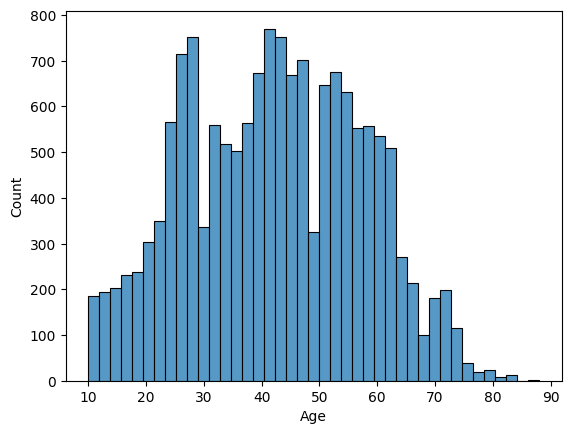

In [25]:
sns.histplot(train, x='Age')

<Axes: xlabel='Age'>

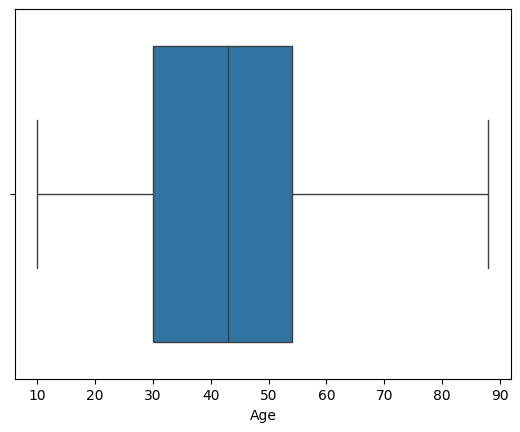

In [26]:
sns.boxplot(train, x='Age')

In [27]:
train['Age'].fillna(train['Age'].mode()[0], inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Buy_product              15589 non-null  int64  
 1   Newsletter_Subscription  15589 non-null  object 
 2   Membership               15589 non-null  object 
 3   Preferred_Game_Genre     15589 non-null  object 
 4   FidelityPoints           15589 non-null  int64  
 5   S1_GameplayExperience    15589 non-null  int64  
 6   S2_GameMechanics         15589 non-null  int64  
 7   S3_GameBalance           15589 non-null  int64  
 8   S4_GameLength            15589 non-null  int64  
 9   S5_MaterialQuality       15589 non-null  int64  
 10  S6_ValueForPrice         15589 non-null  int64  
 11  S7_Artwork_Design        15589 non-null  int64  
 12  S8_ThemeIntegration      15589 non-null  int64  
 13  S9_PlayerIteration       15589 non-null  int64  
 14  S10_LevelAdjust          15

<Axes: xlabel='FidelityPoints'>

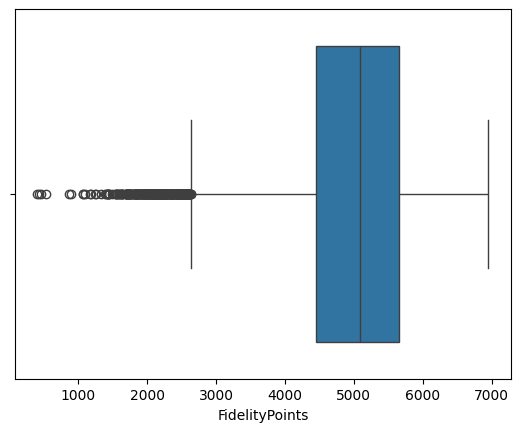

In [29]:
sns.boxplot(train, x='FidelityPoints')

<Axes: >

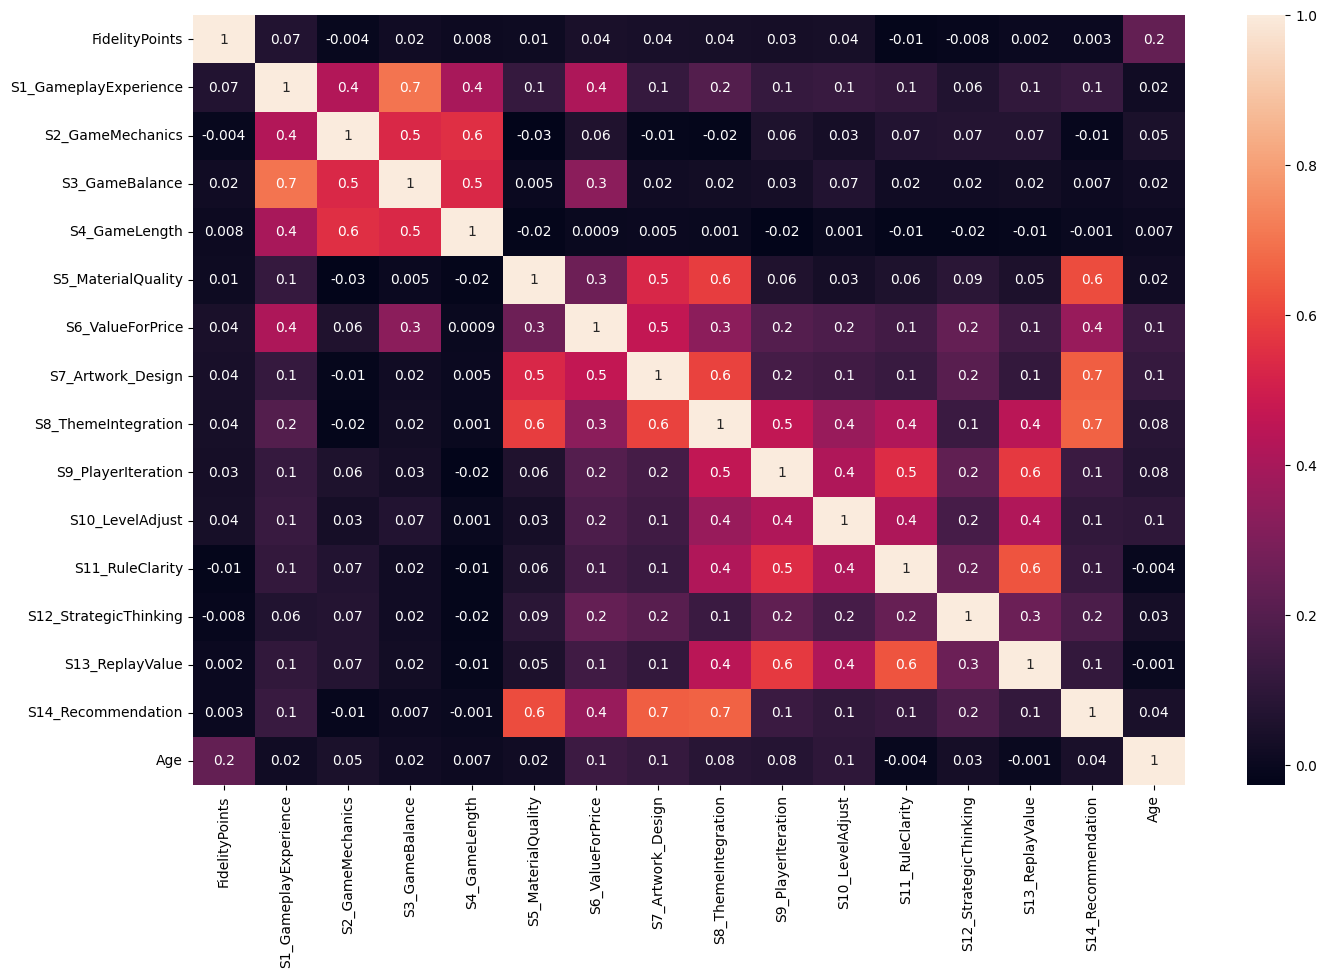

In [30]:
# Drop rows with non-numeric values
# create a new dataframe with just number on it - excluded the categorical values
# Pearson and do not work with binary variables
train_numeric = train.select_dtypes(include='number')

# Drop binary variables
# drop will work for row and columns - when axis = 0 (default) deletes lines
train_spearman = train_numeric.drop(['Buy_product'], axis = 1)

# Calculate correlation matrix
# method corr - correlaçao - pearson é o defult
# heatmap- annot = 1 we want to see the number, fmt we want to see the first significant figure
train_corr = train_spearman.corr(method='spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(train_corr, annot=True, fmt = '.1g')

In [31]:
skf = StratifiedKFold(n_splits = 10, random_state = 99, shuffle = True) #to assure the splits are balanced (could have the data order by data of day, and it can affect the strats)

In [32]:
X = train.drop('Buy_product', axis = 1) #define the independent variables
y = train['Buy_product'].copy() #define the independent variables (our target)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Newsletter_Subscription  15589 non-null  object 
 1   Membership               15589 non-null  object 
 2   Preferred_Game_Genre     15589 non-null  object 
 3   FidelityPoints           15589 non-null  int64  
 4   S1_GameplayExperience    15589 non-null  int64  
 5   S2_GameMechanics         15589 non-null  int64  
 6   S3_GameBalance           15589 non-null  int64  
 7   S4_GameLength            15589 non-null  int64  
 8   S5_MaterialQuality       15589 non-null  int64  
 9   S6_ValueForPrice         15589 non-null  int64  
 10  S7_Artwork_Design        15589 non-null  int64  
 11  S8_ThemeIntegration      15589 non-null  int64  
 12  S9_PlayerIteration       15589 non-null  int64  
 13  S10_LevelAdjust          15589 non-null  int64  
 14  S11_RuleClarity          15

Categorical Variables - Newsletter_Subscription
Membership
Preferred_Game_Genre
Gender
All the recommendations (ordinal)

In [34]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

In [35]:
def apply_chisquare(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result) #use the p-value, hypothesis teste

In [36]:
def select_best_cat_features(X,y):
    count = 1

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y): #splits defined before and the it's going to loop. In each each we define which is the x_train and y_index
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using chi-square
        X_train_cat = X_train[['Newsletter_Subscription','Membership','Preferred_Game_Genre','S1_GameplayExperience','S2_GameMechanics','S3_GameBalance','S4_GameLength','S5_MaterialQuality','S6_ValueForPrice','S7_Artwork_Design','S8_ThemeIntegration','S9_PlayerIteration','S10_LevelAdjust','S11_RuleClarity','S12_StrategicThinking','S13_ReplayValue','S14_Recommendation','Gender']].copy()
        #X_train_cat = X_train[['Newsletter_Subscription','Membership','Preferred_Game_Genre','Gender']].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var],y_train, var)

        count+=1

In [37]:
# Duvida - aqui não deviam ser inseridas apenas as categorical variables?  A Membership  e Preferred_Game_Genre
# no Lab 1 a prof tem "Call the "apply_chisquare" function on your categorical variables"

select_best_cat_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Newsletter_Subscription is IMPORTANT for Prediction
Membership is IMPORTANT for Prediction
Preferred_Game_Genre is IMPORTANT for Prediction
S1_GameplayExperience is IMPORTANT for Prediction
S2_GameMechanics is IMPORTANT for Prediction
S3_GameBalance is IMPORTANT for Prediction
S4_GameLength is IMPORTANT for Prediction
S5_MaterialQuality is IMPORTANT for Prediction
S6_ValueForPrice is IMPORTANT for Prediction
S7_Artwork_Design is IMPORTANT for Prediction
S8_ThemeIntegration is IMPORTANT for Prediction
S9_PlayerIteration is IMPORTANT for Prediction
S10_LevelAdjust is IMPORTANT for Prediction
S11_RuleClarity is IMPORTANT for Prediction
S12_StrategicThinking is IMPORTANT for Prediction
S13_ReplayValue is IMPORTANT fo

In [38]:
numerical_columns = X.select_dtypes(include=[np.number]).columns

In [39]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

In [40]:
numerical_columns

Index(['FidelityPoints', 'S1_GameplayExperience', 'S2_GameMechanics',
       'S3_GameBalance', 'S4_GameLength', 'S5_MaterialQuality',
       'S6_ValueForPrice', 'S7_Artwork_Design', 'S8_ThemeIntegration',
       'S9_PlayerIteration', 'S10_LevelAdjust', 'S11_RuleClarity',
       'S12_StrategicThinking', 'S13_ReplayValue', 'S14_Recommendation',
       'Age'],
      dtype='object')

In [41]:
def select_features_variance(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        for var in numerical_columns:
          apply_variance(X_train[var], var)

        count+=1

In [42]:
select_features_variance(X,y) #variance equal 0 (constant) - we can remove them from the model

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
FidelityPoints:1051626.4283423345
S1_GameplayExperience:1.93146814253562
S2_GameMechanics:2.2993764215221226
S3_GameBalance:2.065816222144873
S4_GameLength:1.6901565116592059
S5_MaterialQuality:1.7568362287120658
S6_ValueForPrice:1.8286893908336803
S7_Artwork_Design:1.7410105896618688
S8_ThemeIntegration:1.7193746971640609
S9_PlayerIteration:1.612896496296466
S10_LevelAdjust:1.67558413645454
S11_RuleClarity:1.339241049761143
S12_StrategicThinking:1.608918868648371
S13_ReplayValue:1.335149723205983
S14_Recommendation:1.6950349309522628
Age:228.9672196941403
_________________________________________________________________________________________________

                                     SPLIT 2                

In [43]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [44]:
def apply_correlation(X_train):
    correlation_data = X
    matrix = correlation_data.corr(method = 'spearman', numeric_only = True)
    cor_heatmap(matrix)

In [45]:
def redundant_features(X,y): #isto é dentro do splits, por isso é que voltamos a fazer o loop
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using spearman correlation
        apply_correlation(X_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


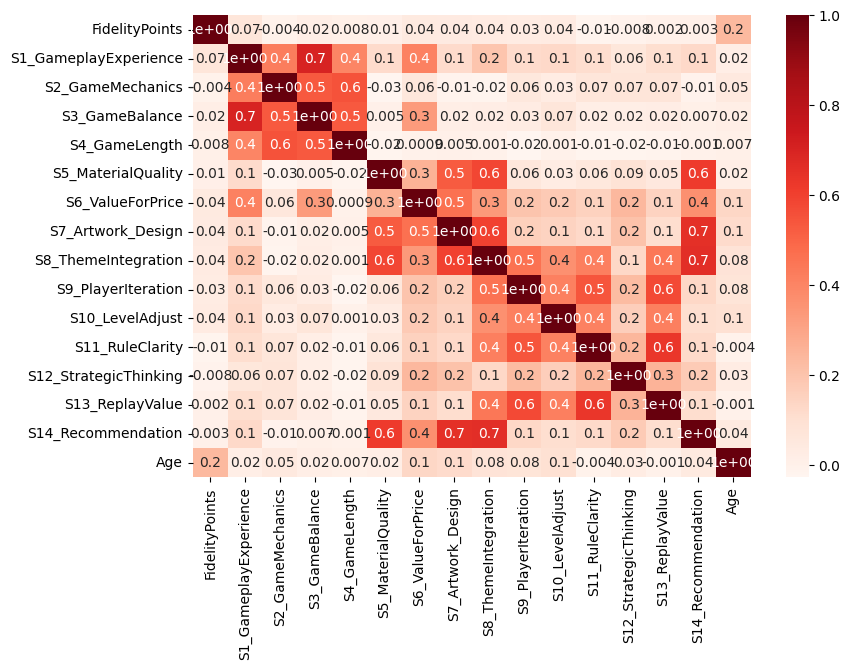

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


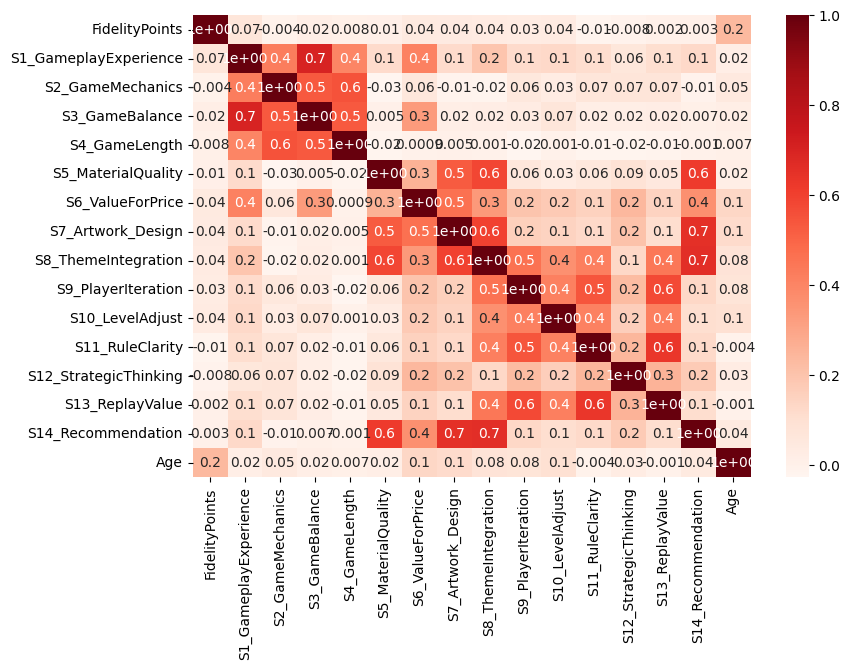

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


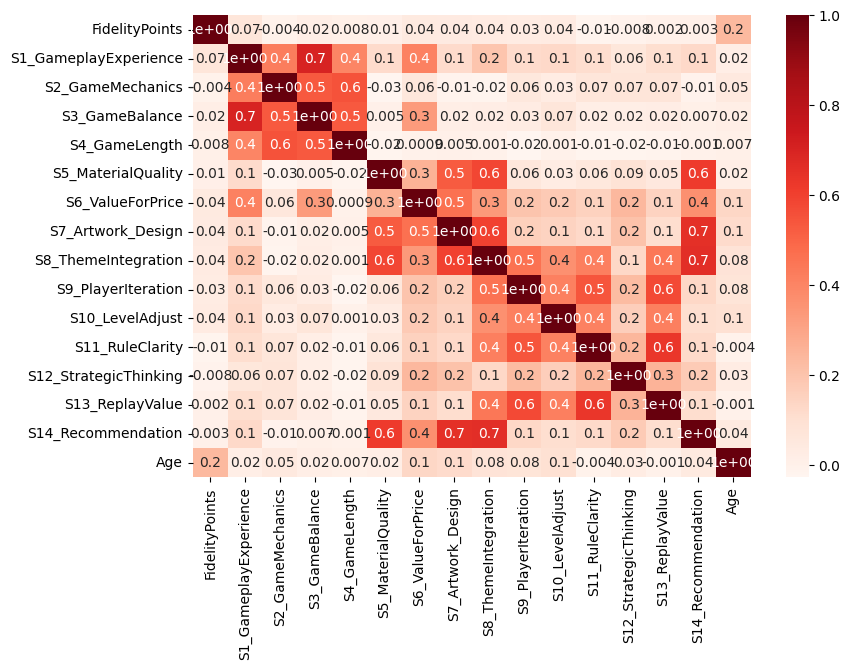

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


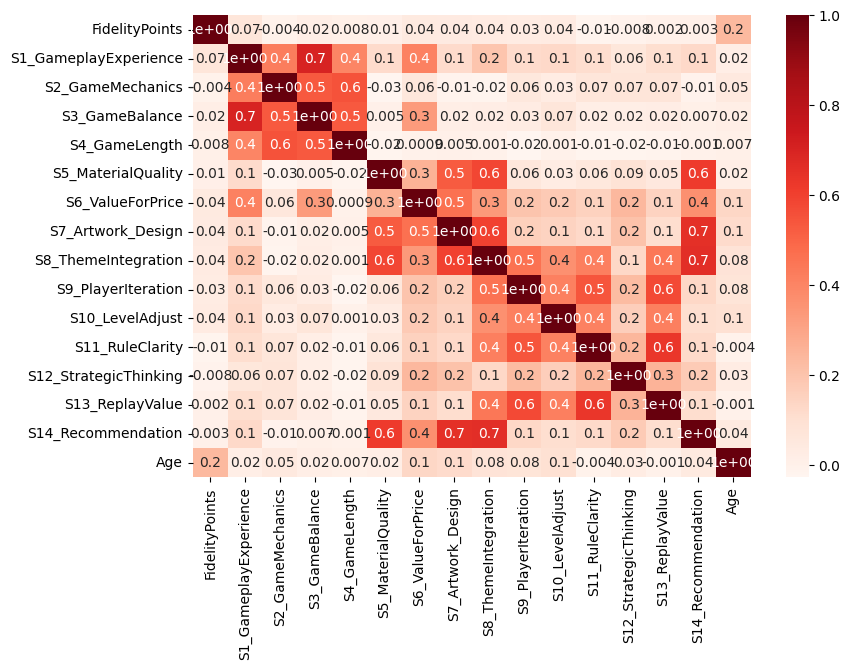

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


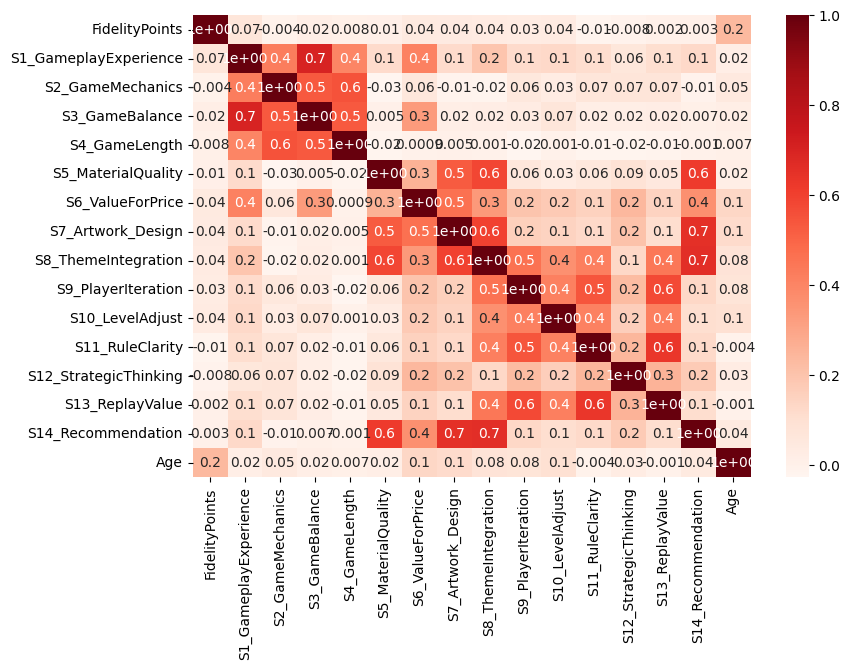

_________________________________________________________________________________________________

                                     SPLIT 6                                    
_________________________________________________________________________________________________


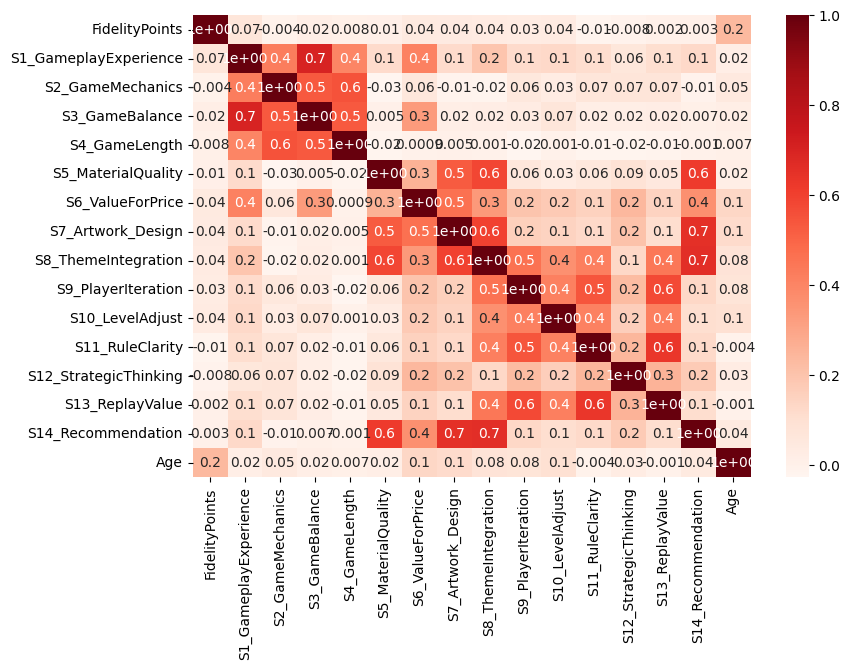

_________________________________________________________________________________________________

                                     SPLIT 7                                    
_________________________________________________________________________________________________


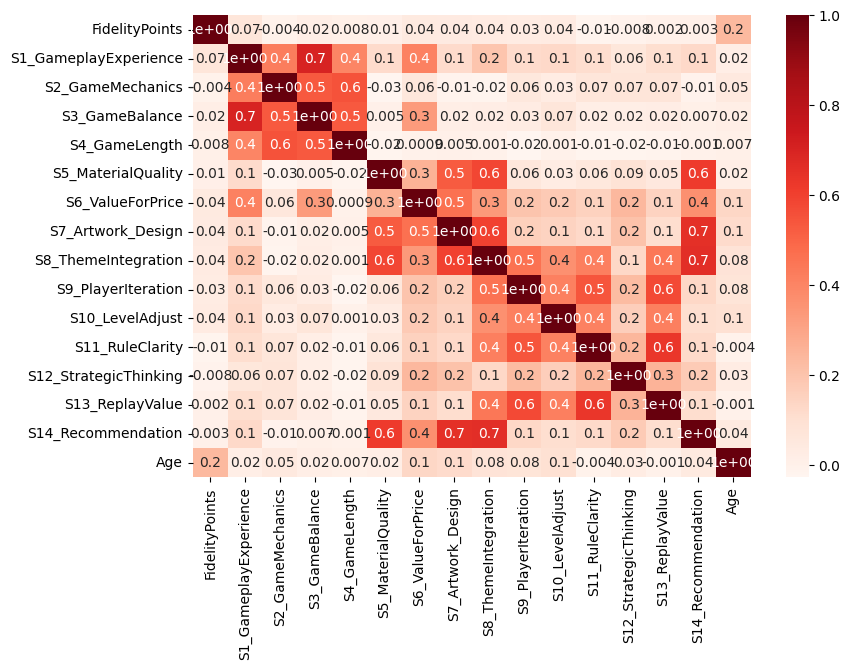

_________________________________________________________________________________________________

                                     SPLIT 8                                    
_________________________________________________________________________________________________


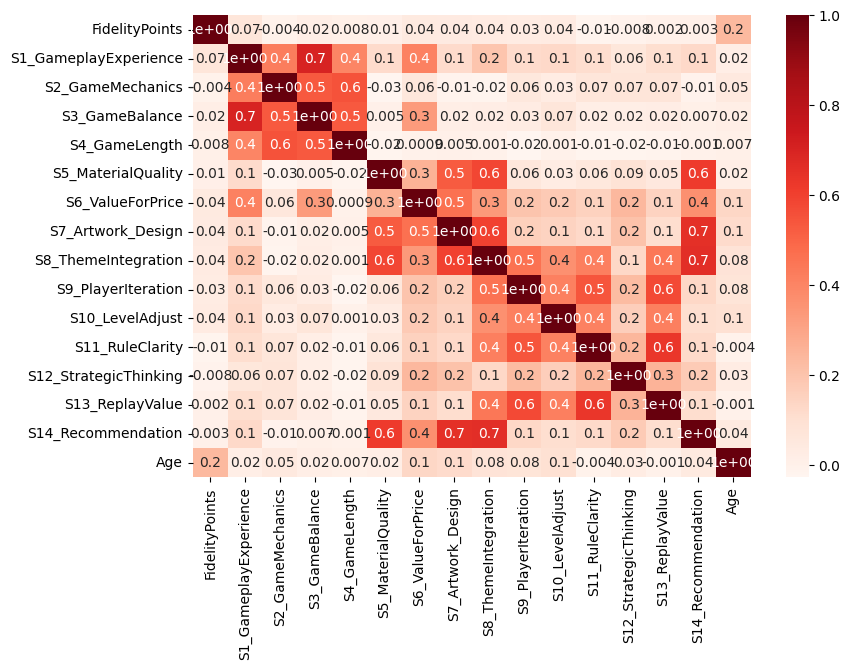

_________________________________________________________________________________________________

                                     SPLIT 9                                    
_________________________________________________________________________________________________


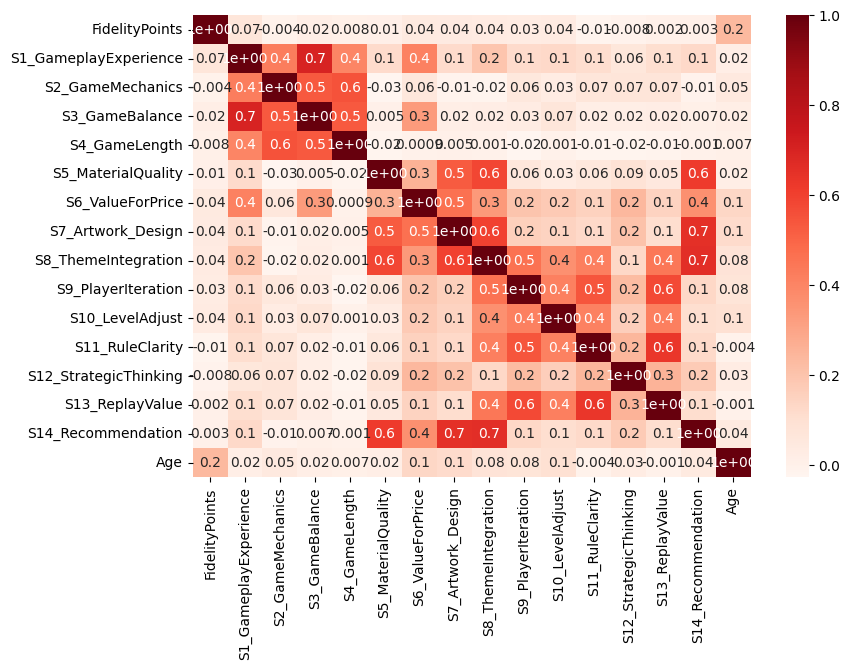

_________________________________________________________________________________________________

                                     SPLIT 10                                    
_________________________________________________________________________________________________


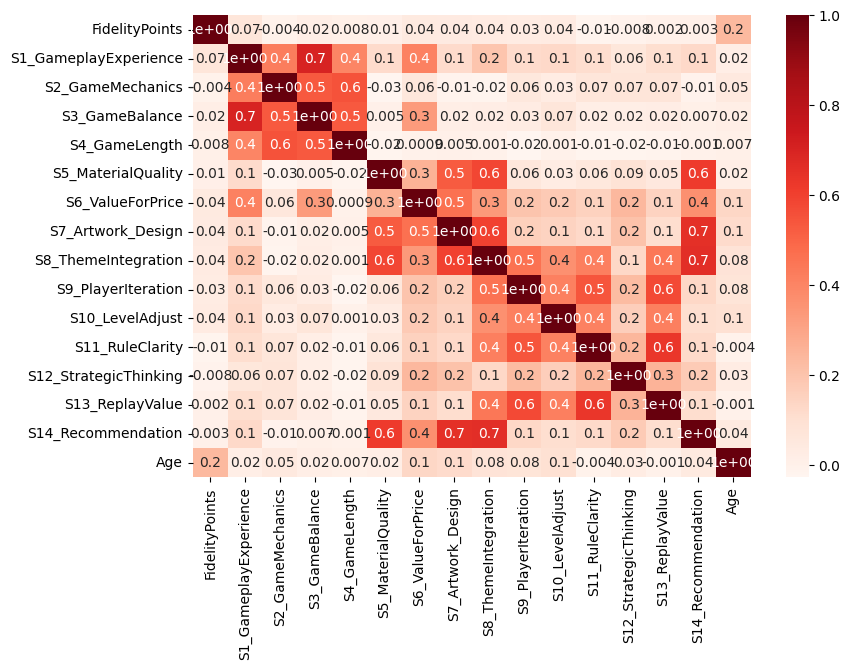

In [46]:
redundant_features(X, y)

In [47]:
def plot_importance(variables,name): #this fuincation is going to receive the importance of the features
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [48]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train) #recieving the data for training and apply the decision tree
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Newsletter_Subscription  15589 non-null  object 
 1   Membership               15589 non-null  object 
 2   Preferred_Game_Genre     15589 non-null  object 
 3   FidelityPoints           15589 non-null  int64  
 4   S1_GameplayExperience    15589 non-null  int64  
 5   S2_GameMechanics         15589 non-null  int64  
 6   S3_GameBalance           15589 non-null  int64  
 7   S4_GameLength            15589 non-null  int64  
 8   S5_MaterialQuality       15589 non-null  int64  
 9   S6_ValueForPrice         15589 non-null  int64  
 10  S7_Artwork_Design        15589 non-null  int64  
 11  S8_ThemeIntegration      15589 non-null  int64  
 12  S9_PlayerIteration       15589 non-null  int64  
 13  S10_LevelAdjust          15589 non-null  int64  
 14  S11_RuleClarity          15

In [50]:
def select_best_features_dt(X, y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using decision Tree
        X_train = X_train.drop([ 'Gender','Newsletter_Subscription','Membership', 'Preferred_Game_Genre'], axis = 1)
        apply_dt(X_train, y_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


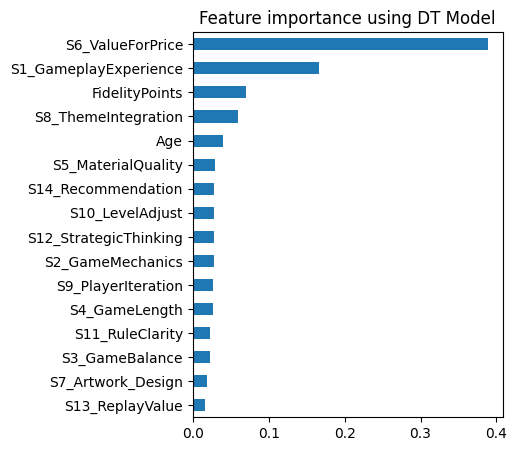

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


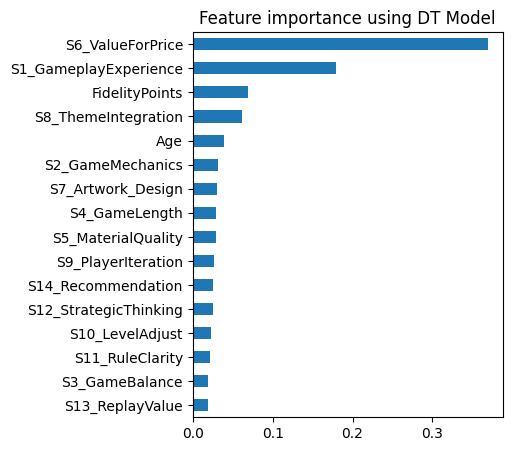

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


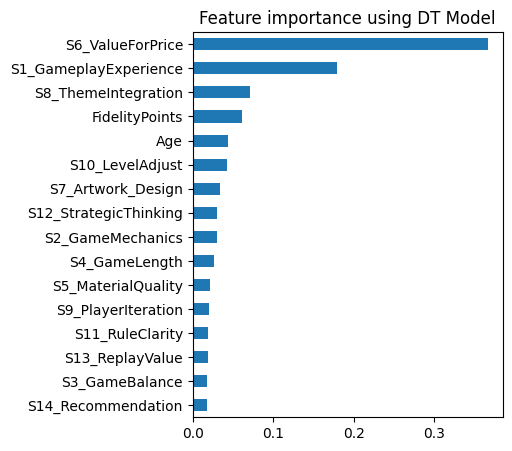

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


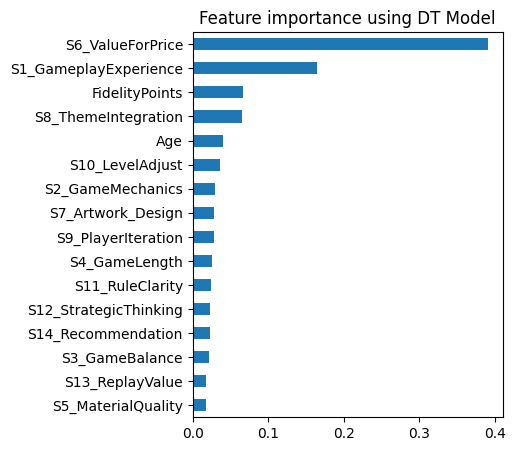

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


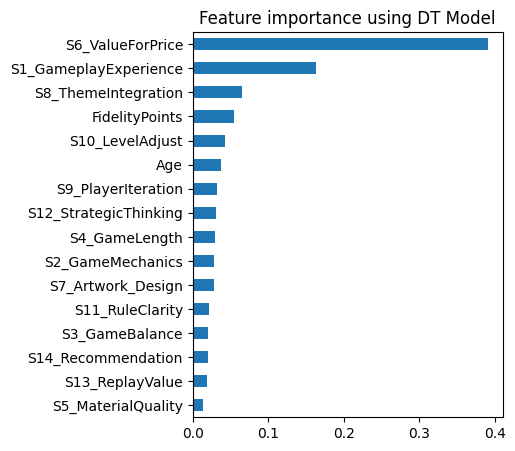

_________________________________________________________________________________________________

                                     SPLIT 6                                    
_________________________________________________________________________________________________


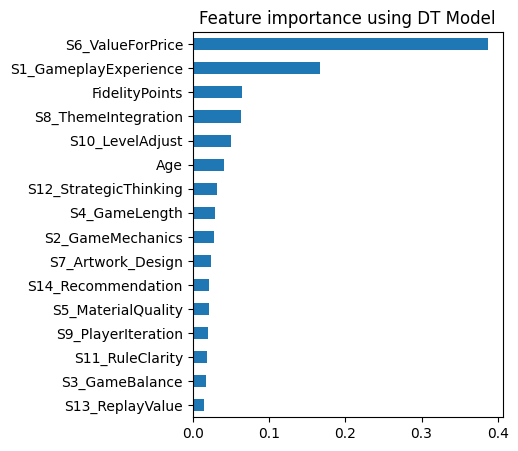

_________________________________________________________________________________________________

                                     SPLIT 7                                    
_________________________________________________________________________________________________


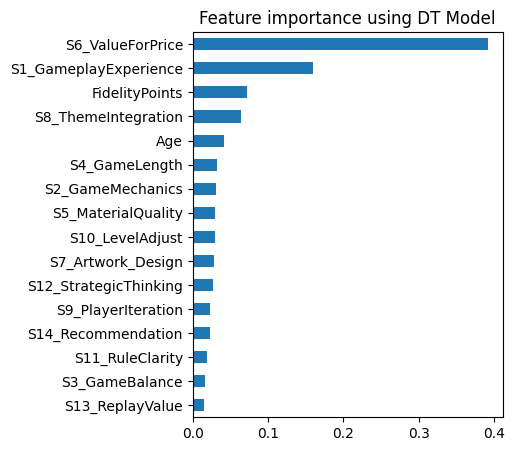

_________________________________________________________________________________________________

                                     SPLIT 8                                    
_________________________________________________________________________________________________


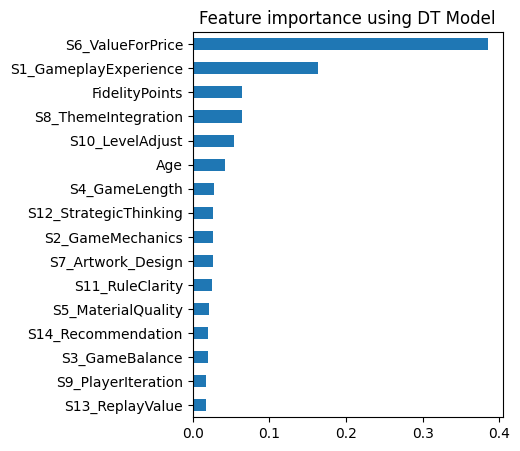

_________________________________________________________________________________________________

                                     SPLIT 9                                    
_________________________________________________________________________________________________


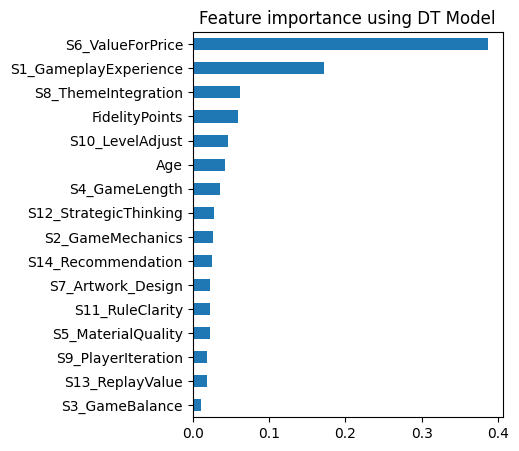

_________________________________________________________________________________________________

                                     SPLIT 10                                    
_________________________________________________________________________________________________


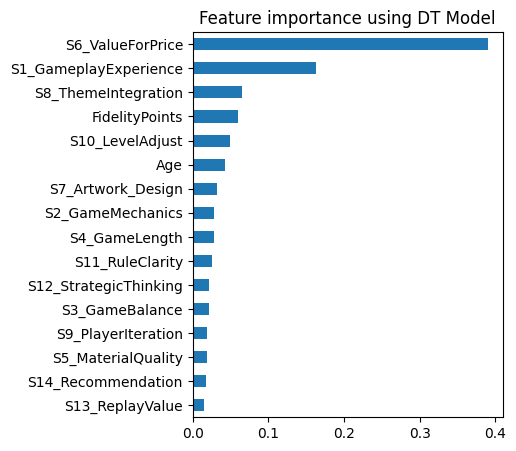

In [51]:
select_best_features_dt(X, y)

In [52]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5) #define characteristics of rfe
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

In [53]:
def apply_lasso(X_train, y_train):
    X_train = X_train
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    coef_df = coef.reset_index()
    coef_df.columns = ['Feature', 'Coefficient']
    print(coef_df)
    #plot_importance(coef,'Lasso')


In [54]:
def select_best_features_lasso(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        numerical_data = X_train.drop(['Gender','Newsletter_Subscription','Membership', 'Preferred_Game_Genre'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)

        count+=1

In [55]:
select_best_features_lasso(X, y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- LASSO ----------------------
                  Feature  Coefficient
0          FidelityPoints    -0.007637
1   S1_GameplayExperience     0.122758
2        S2_GameMechanics    -0.141646
3          S3_GameBalance    -0.123742
4           S4_GameLength     0.069820
5      S5_MaterialQuality    -0.058446
6        S6_ValueForPrice     0.675351
7       S7_Artwork_Design     0.123737
8     S8_ThemeIntegration     0.270959
9      S9_PlayerIteration     0.200047
10        S10_LevelAdjust     0.218605
11        S11_RuleClarity     0.011296
12  S12_StrategicThinking     0.153473
13        S13_ReplayValue    -0.000000
14     S14_Recommendation     0.060915
15                    Age     0.083507
___________

                        Split_1   Split_2   Split_3   Split_4   Split_5  \
S6_ValueForPrice       0.390704  0.369270  0.365967  0.390551  0.390831   
S1_GameplayExperience  0.166536  0.180064  0.180334  0.163340  0.164148   
FidelityPoints         0.070501  0.072675  0.062339  0.066674  0.054415   
S8_ThemeIntegration    0.058434  0.061552  0.070782  0.065755  0.067943   
S10_LevelAdjust        0.026486  0.023386  0.043571  0.036042  0.043020   
Age                    0.036112  0.037125  0.043325  0.036760  0.039282   
S4_GameLength          0.027342  0.029128  0.027117  0.025464  0.029571   
S2_GameMechanics       0.027124  0.032214  0.030616  0.031923  0.030305   
S12_StrategicThinking  0.028086  0.026961  0.029683  0.022246  0.028420   
S7_Artwork_Design      0.020699  0.030624  0.034726  0.028621  0.027919   
S9_PlayerIteration     0.027531  0.025434  0.019733  0.027051  0.031458   
S14_Recommendation     0.028633  0.024451  0.017441  0.021313  0.019752   
S5_MaterialQuality     0.

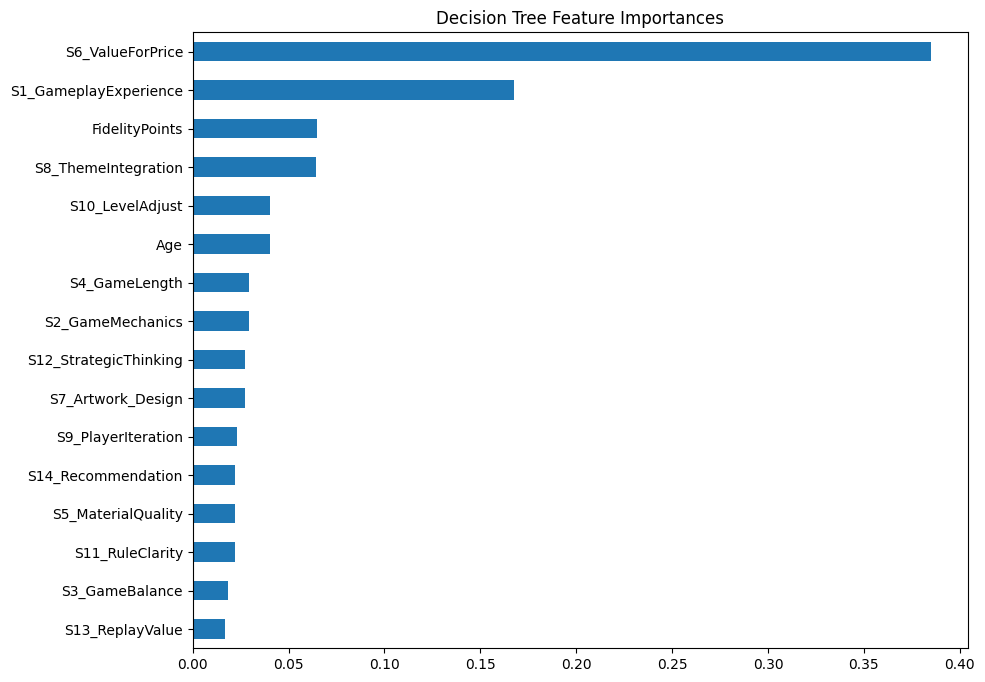

In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Mock apply_dt function
def apply_dt(X, y):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X, y)
    return model.feature_importances_

# Function to select best features using Decision Tree
def select_best_features_dt_1(X, y):
    skf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
    all_importances = []

    count = 1
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale numerical data
        numerical_data = X_train.drop(['Gender', 'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre'], axis=1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_data.columns)

        # Check which features to use using Decision Tree
        feature_importances = apply_dt(X_train_scaled, y_train)
        all_importances.append(feature_importances)

        count += 1

    # Create a DataFrame from the results
    importance_df = pd.DataFrame(all_importances, columns=numerical_data.columns).T
    importance_df.columns = [f'Split_{i}' for i in range(1, count)]
    importance_df['Mean_Importance'] = importance_df.mean(axis=1)
    importance_df = importance_df.sort_values(by='Mean_Importance', ascending=False)

    return importance_df

# Assuming X and y are defined elsewhere in your script
importance_df = select_best_features_dt_1(X, y)
print(importance_df)

# Function to plot the mean feature importances
def plot_importance(importances, title):
    plt.figure(figsize=(10, 8))
    importances.sort_values().plot(kind='barh')
    plt.title(title)
    plt.show()

# Plot the mean feature importances
plot_importance(importance_df['Mean_Importance'], 'Decision Tree Feature Importances')

In [57]:
def select_best_features_rfe(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        numerical_data = X_train.drop(['Gender','Newsletter_Subscription','Membership', 'Preferred_Game_Genre'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)

        count+=1

In [58]:
select_best_features_rfe(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints           False
S1_GameplayExperience    False
S2_GameMechanics         False
S3_GameBalance           False
S4_GameLength            False
S5_MaterialQuality       False
S6_ValueForPrice          True
S7_Artwork_Design        False
S8_ThemeIntegration       True
S9_PlayerIteration        True
S10_LevelAdjust           True
S11_RuleClarity          False
S12_StrategicThinking     True
S13_ReplayValue          False
S14_Recommendation       False
Age                      False
dtype: bool
_________________________________________________________________________________________________

                                     SPLIT 2                         

In [64]:
def apply_mic(X, y):

    # Initialize the MINE object
    mine = MINE()

    # Calculate MIC scores for each feature
    mic_scores = []
    for column in X.columns:
        mine.compute_score(X[column], y)
        mic_scores.append(mine.mic())

    # Create a DataFrame with the results
    mic_df = pd.DataFrame({
        'Feature': X.columns,
        'MIC': mic_scores
    })

    # Sort the DataFrame by MIC scores
    mic_df = mic_df.sort_values(by='MIC', ascending=False)

    print(mic_df)

In [65]:
def select_best_features_mic(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        numerical_data = X_train.drop(['Gender','Newsletter_Subscription','Membership', 'Preferred_Game_Genre'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # Check which features to use using RFE
        print('')
        print('----------------- MIC ----------------------')
        apply_mic(X_train_scaled, y_train)

        count+=1

In [109]:
pip install minepy


In [114]:
select_best_features_mic(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- MIC ----------------------


NameError: name 'MINE' is not defined

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Newsletter_Subscription  15589 non-null  object 
 1   Membership               15589 non-null  object 
 2   Preferred_Game_Genre     15589 non-null  object 
 3   FidelityPoints           15589 non-null  int64  
 4   S1_GameplayExperience    15589 non-null  int64  
 5   S2_GameMechanics         15589 non-null  int64  
 6   S3_GameBalance           15589 non-null  int64  
 7   S4_GameLength            15589 non-null  int64  
 8   S5_MaterialQuality       15589 non-null  int64  
 9   S6_ValueForPrice         15589 non-null  int64  
 10  S7_Artwork_Design        15589 non-null  int64  
 11  S8_ThemeIntegration      15589 non-null  int64  
 12  S9_PlayerIteration       15589 non-null  int64  
 13  S10_LevelAdjust          15589 non-null  int64  
 14  S11_RuleClarity          15

**Feature Selection with Random Forests**

"Another useful approach for selecting relevant features from a dataset is using a random forest, an ensemble technique.
Using a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without
making any assumptions about whether our data is linearly separable or not. Conveniently, the random forest implementation in scikit-learn already collects the feature importance values for us so that we can access them via the feature_importances_ attribute after fitting a RandomForestClassifier."

*Machine Learning with PyTorch and Scikit Learn* p. 134

In [69]:
# copiar dataframe para testar com random forests
train_rf = train.copy()

**One hot encoding for categorical variables**

"When we are using one-hot encoding datasets, we have to keep in mind that this introduces multicollinearity, which can be an issue for certain methods.
If features are highly correlated, matrices are computationally difficult to invert, which can lead to numerically unstable estimates. To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array."

*Machine Learning with PyTorch and Scikit Learn* p. 115



In [106]:
# Transformar as categorical variables em features com binary
# drop_first=True devido ao parágrafo anterior
train_rf_dummies = pd.get_dummies(train_rf[["Newsletter_Subscription", "Membership", "Gender", "Preferred_Game_Genre"]], dtype=int, drop_first=True)
train_rf = train_rf.merge(train_rf_dummies, how='left', left_index=True, right_index=True)
train_rf = train_rf.drop(columns=["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"])
train_rf

KeyError: "None of [Index(['Newsletter_Subscription', 'Membership', 'Gender',\n       'Preferred_Game_Genre'],\n      dtype='object')] are in the [columns]"

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# usa o default Gini
forest = RandomForestClassifier()

In [74]:
target = train_rf["Buy_product"].copy()
features = train_rf.drop(columns="Buy_product").copy()

In [75]:
rf = forest.fit(features, target)
rf.feature_importances_

array([0.04399876, 0.13235507, 0.02842863, 0.03951512, 0.02397447,
       0.02004111, 0.19576648, 0.06861149, 0.07408685, 0.03830735,
       0.04574129, 0.02583904, 0.03047778, 0.02456481, 0.03950515,
       0.03820043, 0.04149993, 0.02349168, 0.02675626, 0.03603131,
       0.00280697])

Text(0.5, 1.0, 'Feature importances')

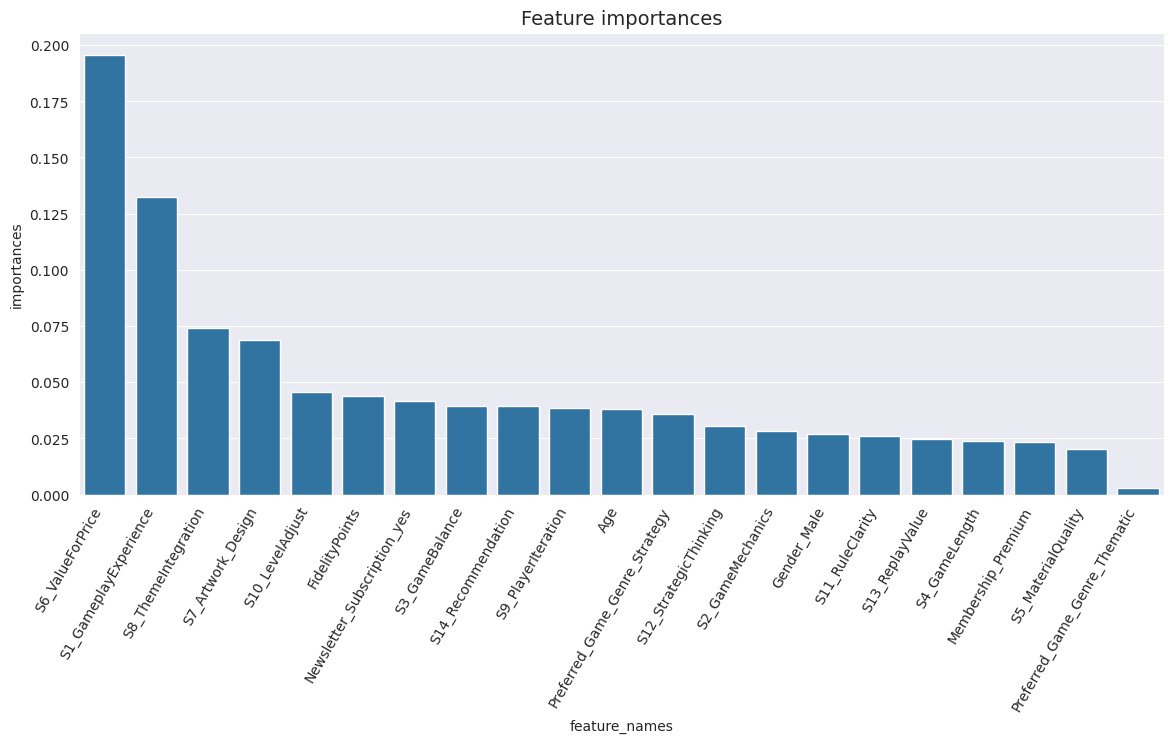

In [76]:
feature_importance_df = pd.DataFrame({"feature_names" : rf.feature_names_in_, "importances" : rf.feature_importances_}).sort_values("importances", ascending=False)
sns.set_style('darkgrid')
plt.subplots(figsize=(14, 6))
fig = sns.barplot(feature_importance_df, x=feature_importance_df["feature_names"], y=feature_importance_df["importances"])
plt.xticks(rotation=60, ha='right')
fig.set_title("Feature importances", fontsize=14)

**Feature Selection with Permutation**

Permutation importance assesses the significance of each feature independently in out-of-bag cross-validated predictions, providing a more reliable and robust measure.

By evaluating the impact of individual feature permutations on predictions, it calculates importance. This method involves randomly shuffling a single feature’s values and measuring the resulting performance decrease (e.g., accuracy, F1-score). Comparing the model’s original and permuted values allows for a precise evaluation of feature importance.

The code uses the permutation_importance function to calculate permutation feature importance for each feature in a trained classifier, where:

n_repeats: Specifies how many times each feature is permuted to calculate the importance.

n_jobs: Determines the number of parallel jobs to run. Setting it to -1 utilizes all available CPU cores, improving computation speed.

(https://www.geeksforgeeks.org/feature-importance-with-random-forests/)

In [77]:
from sklearn.inspection import permutation_importance

In [78]:
result = permutation_importance(rf, features, target, n_repeats=10, random_state=0, n_jobs=-1)

In [79]:
# A funcao faz um shuffle das features e vê quais afetam mais o resultado. Quanto mais alta a Permutation Importance, mais diferença o shuffle nessa feature causou, ou seja, mais importante é.
perm_imp_df = pd.DataFrame({'Feature': rf.feature_names_in_, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
perm_imp_df

Feature  Permutation Importance
1           S1_GameplayExperience                0.118949
6                S6_ValueForPrice                0.055655
16    Newsletter_Subscription_yes                0.045474
12          S12_StrategicThinking                0.020931
7               S7_Artwork_Design                0.017634
10                S10_LevelAdjust                0.014619
18                    Gender_Male                0.013728
19  Preferred_Game_Genre_Strategy                0.012714
8             S8_ThemeIntegration                0.010879
17             Membership_Premium                0.010058
15                            Age                0.009346
9              S9_PlayerIteration                0.009186
11                S11_RuleClarity                0.007871
14             S14_Recommendation                0.007762
0                  FidelityPoints                0.007095
13                S13_ReplayValue                0.006857
2                S2_GameMechanics                0.006248
4                   S4_GameLength                0.005741
3                  S3_GameBalance                0.005619
5              S5_MaterialQuality                0.002585
20  Preferred_Game_Genre_Thematic                0.000423

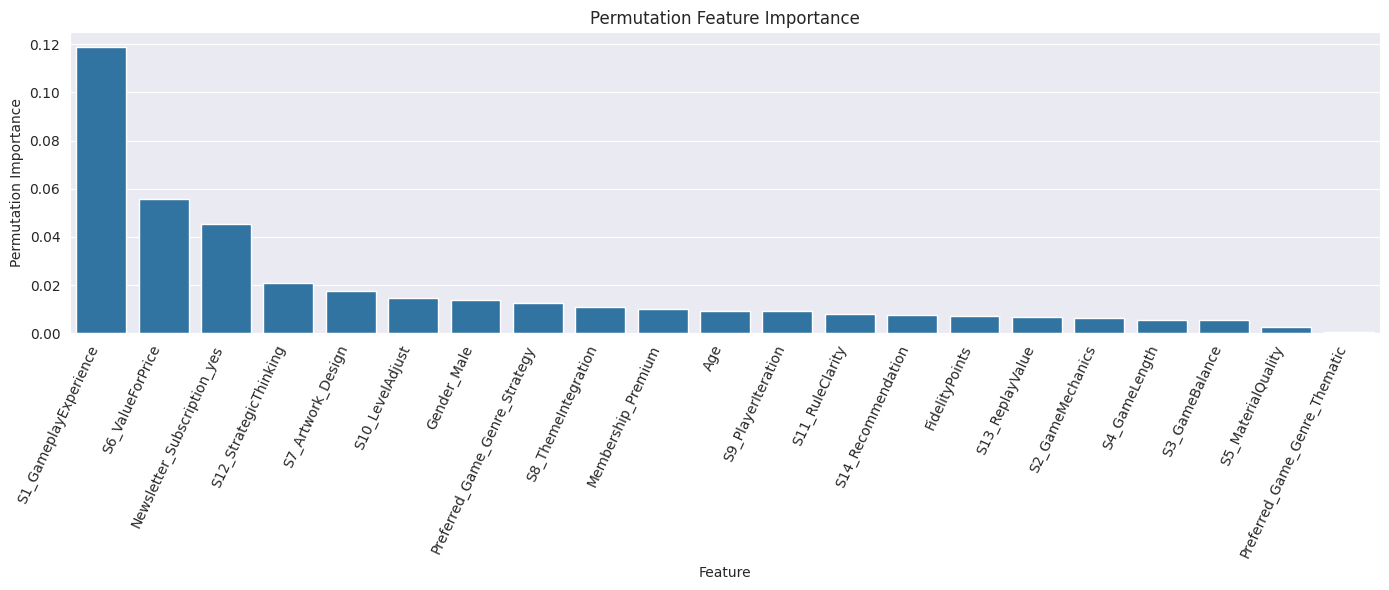

In [80]:
plt.figure(figsize=(14, 6))
fig = sns.barplot(perm_imp_df, x=perm_imp_df["Feature"], y=perm_imp_df["Permutation Importance"])
#plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()

In [81]:
#Pessoal, aqui esquecemos de considerar o ChiSquare teste que analisa o impacto das variaveis categoricas
#Resultados:
#Newsletter_Subscription is IMPORTANT for Prediction
#Membership is IMPORTANT for Prediction
#Preferred_Game_Genre is IMPORTANT for Prediction
#Gender is IMPORTANT for Prediction

#Uma vez que estas variaveis são apenas analisadas neste teste, elas deveriam ser incluidas no keep_data
#Nota, se usarem o exemplo que ela deu na aula, ter em atenção a função encode_data, sempre excluir uma das dummies criadas por cada categorical variable

import pandas as pd
dados_modelos = {
    'DT': [
        'S6_ValueForPrice',
        'S1_GameplayExperience',
        'FidelityPoints',
        'S8_ThemeIntegration',
        'Age',
        'S10_LevelAdjust'
    ],
    'LASSO': [
        'S1_GameplayExperience',
        'S2_GameMechanics',
        'S3_GameBalance',
        'S4_GameLength',
        'S5_MaterialQuality',
        'S6_ValueForPrice',
        'S7_Artwork_Design',
        'S8_ThemeIntegration',
        'S9_PlayerIteration',
        'S10_LevelAdjust',
        'S12_StrategicThinking',
        'S14_Recommendation',
        'Age'
    ],
    'Random_Forest_GINI': [
        'S6_ValueForPrice',
        'S1_GameplayExperience',
        'S7_Artwork_Design',
        'S8_ThemeIntegration',
        'S10_LevelAdjust',
        'FidelityPoints',
        'S9_PlayerIteraction',
        'S3_GameBalance'
    ],
    'Random_Forest_PI': [
        'S1_GameplayExperience',
        'S6_ValueForPrice',
        'Newsletter Subscription Yes',
        'S12_StrategicThinking',
        'S7_Artwork_Design',
        'S10_LevelAdjust'
    ],

    'RFE': [
        'S6_ValueForPrice',
        'S8_ThemeIntegration',
        'S9_PlayerIteration',
        'S10_LevelAdjust',
        'S12_StrategicThinking'
    ],
    'MIC':[
        'S6_ValueForPrice',
        'S1_GameplayExperience',
        'S8_ThemeIntegration',
        'S7_Artwork_Design',
        'S14_Recommendation'
    ]
}

df_modelos = pd.DataFrame.from_dict(dados_modelos, orient='index')
df_modelos = df_modelos.transpose()
df_modelos

DT                  LASSO     Random_Forest_GINI  \
0        S6_ValueForPrice  S1_GameplayExperience       S6_ValueForPrice   
1   S1_GameplayExperience       S2_GameMechanics  S1_GameplayExperience   
2          FidelityPoints         S3_GameBalance      S7_Artwork_Design   
3     S8_ThemeIntegration          S4_GameLength    S8_ThemeIntegration   
4                     Age     S5_MaterialQuality        S10_LevelAdjust   
5         S10_LevelAdjust       S6_ValueForPrice         FidelityPoints   
6                    None      S7_Artwork_Design    S9_PlayerIteraction   
7                    None    S8_ThemeIntegration         S3_GameBalance   
8                    None     S9_PlayerIteration                   None   
9                    None        S10_LevelAdjust                   None   
10                   None  S12_StrategicThinking                   None   
11                   None     S14_Recommendation                   None   
12                   None                    Age                   None   

               Random_Forest_PI                    RFE                    MIC  
0         S1_GameplayExperience       S6_ValueForPrice       S6_ValueForPrice  
1              S6_ValueForPrice    S8_ThemeIntegration  S1_GameplayExperience  
2   Newsletter Subscription Yes     S9_PlayerIteration    S8_ThemeIntegration  
3         S12_StrategicThinking        S10_LevelAdjust      S7_Artwork_Design  
4             S7_Artwork_Design  S12_StrategicThinking     S14_Recommendation  
5               S10_LevelAdjust                   None                   None  
6                          None                   None                   None  
7                          None                   None                   None  
8                          None                   None                   None  
9                          None                   None                   None  
10                         None                   None                   None  
11                         None                   None                   None  
12                         None                   None                   None

In [82]:
sets = [set(df_modelos[col]) for col in df_modelos.columns]
common_values = set.intersection(*sets)
common_values_list = list(common_values)
common_values

{'S6_ValueForPrice'}

In [83]:
all_values = df_modelos.values.flatten()
value_counts = pd.Series(all_values).value_counts()
value_counts


S6_ValueForPrice               6
S1_GameplayExperience          5
S8_ThemeIntegration            5
S10_LevelAdjust                5
S7_Artwork_Design              4
S12_StrategicThinking          3
FidelityPoints                 2
S3_GameBalance                 2
S9_PlayerIteration             2
Age                            2
S14_Recommendation             2
S2_GameMechanics               1
Newsletter Subscription Yes    1
S4_GameLength                  1
S5_MaterialQuality             1
S9_PlayerIteraction            1
Name: count, dtype: int64

In [84]:
keep_data = train[['S6_ValueForPrice','S1_GameplayExperience','S8_ThemeIntegration','S10_LevelAdjust', 'Buy_product', 'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre', 'Gender']].copy()
all_data = train[['S6_ValueForPrice','S1_GameplayExperience','S8_ThemeIntegration','S10_LevelAdjust','S7_Artwork_Design','S12_StrategicThinking','S14_Recommendation','Age','S9_PlayerIteration','S3_GameBalance','FidelityPoints','Buy_product',  'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre', 'Gender']].copy()

Dummie variables das categorical variables. O dtype=int deixa os valores em binário (o default é boolean), e o drop_first=True faz drop da primeira coluna para evitar multicollinearity

In [85]:
# keep_data com dummie variables: keep_data_encoded
train_keepdata_dummies = pd.get_dummies(keep_data[["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"]], dtype=int, drop_first=True)
keep_data_encoded = keep_data.merge(train_keepdata_dummies, how='left', left_index=True, right_index=True)
keep_data_encoded = keep_data_encoded.drop(columns=["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"])

In [86]:
# all_data com dummie variables: all_data_encoded
train_alldata_dummies = pd.get_dummies(all_data[["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"]], dtype=int, drop_first=True)
all_data_encoded = all_data.merge(train_alldata_dummies, how='left', left_index=True, right_index=True)
all_data_encoded = all_data_encoded.drop(columns=["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"])

Scalling data com MinMaxScaler

In [87]:
# fazemos scalling das variáveis sem o target, criamos uma df e juntamos tudo de novo. A df final tem o target como estava e as variáveis scaled.

#separar as features do target
keep_data_encoded_X = keep_data_encoded.drop(columns='Buy_product').copy()
keep_data_encoded_y = keep_data_encoded["Buy_product"].copy()

all_data_encoded_X = all_data_encoded.drop(columns='Buy_product').copy()
all_data_encoded_y = all_data_encoded["Buy_product"].copy()

# scale as features
scaler = MinMaxScaler()
scaled_keep = scaler.fit_transform(keep_data_encoded_X)
scaled_all = scaler.fit_transform(all_data_encoded_X)

# criar df com os novos dados
keep_data_encoded_scaled = pd.DataFrame(scaled_keep, columns=keep_data_encoded_X.columns, index=keep_data_encoded_X.index)
keep_data_encoded_scaled = keep_data_encoded_scaled.merge(keep_data_encoded_y, left_index=True, right_index=True)

all_data_encoded_scaled = pd.DataFrame(scaled_all, columns=all_data_encoded_X.columns, index=all_data_encoded_X.index)
all_data_encoded_scaled = all_data_encoded_scaled.merge(all_data_encoded_y, left_index=True, right_index=True)


Nesta fase temos 6 dataframes:

**keep_data**: tabela com os variaveis mais importantes pela feature selection e o target (Buy_Product)

**keep_data_encoded**: o mesmo que o keep_data mas com as variaveis categoricas em dummie variables

**keep_data_encoded_scaled**: o mesmo que o keep_data_encoded mas com as variaveis scaled pelo MinMaxScaler


**all_data**: tabela com os variaveis mais importantes pela feature selection e o target (Buy_Product), mais as variaveis que estavam em duvida

**all_data_encoded**: o mesmo que o all_data mas com as variaveis categoricas em dummie variables

**all_data_encoded_scaled**: o mesmo que o all_data_encoded mas com as variaveis scaled pelo MinMaxScaler


O objectivo das df_scaled é termos já uma df pronta a ser usada para as randomsearch e gridsearch. Não as usar com as formulas do Lab porque a formula select_best_models já faz o scalling, e assim seria feito duas vezes.

Decision Tree - Renato

KNN - Rui

Neural Networks - Haneet

SVM - Mario

Random Forest - Sérgio





**Support Vector Machine (SVM) Algorithm**

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [89]:
X_keep_svm = keep_data_encoded_scaled.drop(columns="Buy_product").copy()
y_keep_svm = keep_data_encoded_scaled["Buy_product"].copy()

X_all_svm = all_data_encoded_scaled.drop(columns="Buy_product").copy()
y_all_svm = all_data_encoded_scaled["Buy_product"].copy()

SVM has several methods (kernels) which can be used. Default is RBF. The kernels can be divided into two groups, 'linear' for linearly separable data and the rest like 'RBF' and 'Poly' for non-linear data. The linear kernel is simple and provides very good results when the data is linearly separable (sources in report). For this reason, we first decided to plot the data to check if it was linearly separable, in which case we could employ SVC with kernel='linear'

In [90]:
from sklearn.decomposition import PCA

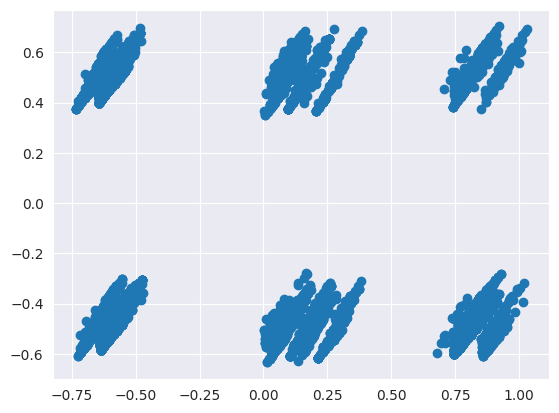

In [91]:
pca_model = PCA(n_components=2)
keep_data_reduced = pca_model.fit_transform(X_keep_svm)
plt.scatter(keep_data_reduced[:,0], keep_data_reduced[:,1])

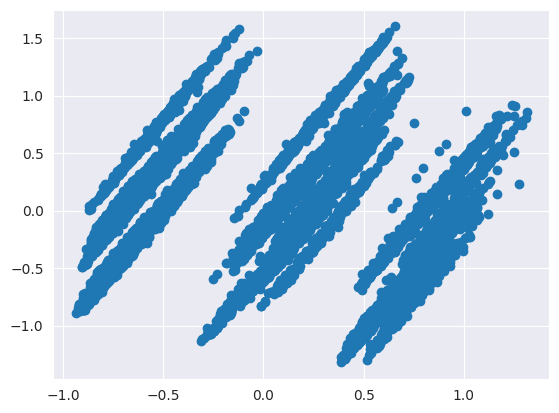

In [92]:
pca_model = PCA(n_components=2)
all_data_reduced = pca_model.fit_transform(X_all_svm)
plt.scatter(all_data_reduced[:,0], all_data_reduced[:,1])

Data looks linearly separable, so we can try first with the linear method of the RBF kernel from SVM

In [93]:
def select_best_models_svm(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = data.drop('Buy_product', axis = 1)
    y = data['Buy_product'].copy()

    score_train, score_val = [],[]

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale the data
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

In [94]:
def show_results_svm(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models_svm(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [95]:
linear_model_all = SVC(kernel='linear')

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['linear'])

show_results_svm(df_all, keep_data_encoded, linear_model_all)

Train    Validation
linear  0.836+/-0.0  0.835+/-0.01

In [96]:
linear_model_all = SVC(kernel='linear')

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['linear'])

show_results_svm(df_all, all_data_encoded, linear_model_all)

Train    Validation
linear  0.845+/-0.0  0.844+/-0.01

This cell is commented out because the Grid Search takes 40min to run. The results are in the comments at the bottom of the cell

In [97]:
#param_grid_svm_linear = {'C': [0.1, 0.5, 1, 10, 100, 200, 300, 400, 1000],
#                      'kernel': ['linear']}

#grid_search = GridSearchCV(SVC(),
#                        param_grid_svm_linear,
#                        scoring = 'f1',
#                        return_train_score = True,
#                        cv = 5,
#                        verbose=1)

#grid_search.fit(X_all_svm, y_all_svm)

# Print the best hyperparameters and corresponding score
#print("Best Hyperparameters: ", grid_search.best_params_)
#print("Best Score: ", grid_search.best_score_)

# Results:
# Fitting 5 folds for each of 9 candidates, totalling 45 fits
# Best Hyperparameters:  {'C': 300, 'kernel': 'linear'}
# Best Score:  0.8448926308179159


In [98]:
linear_model_tunned_all = SVC(kernel='linear', C=300)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['linear'])

show_results_svm(df_all, all_data_encoded, linear_model_tunned_all)

Train    Validation
linear  0.845+/-0.0  0.845+/-0.01

The scores seem low, especially when compared to the scores from other algorithms like KNN and DTs. So we decided to try with a kernel method, which are best for non-linearly separable data. We'll try with the default kernel, RBF

**SKLearn Documentation:**

"When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

**Proper choice of C and gamma is critical to the SVM’s performance.** One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values."

For this reason, we'll run GridSearchCV before even trying the model with default values, to make sure we have good hyperparameters when testing

The next two cells are commented out because the Grid Search takes more than one hour to run. The results for each are in the comments at the bottom of each cell.

In [99]:
#param_grid_svm_rbf = {'C': [1, 10, 100, 200, 300, 400, 1000],
#              'gamma': [7, 6, 5, 4, 3, 1, 0.8, 0.5, 0.3, 0.1],
#              'kernel': ['rbf']}

#grid_search = GridSearchCV(SVC(),
#                        param_grid_svm_rbf,
#                        scoring = 'f1',
#                        return_train_score = True,
#                        cv = 5,
#                        verbose=1)

#grid_search.fit(X_keep_svm, y_keep_svm)

# Print the best hyperparameters and corresponding score
#print("Best Hyperparameters: ", grid_search.best_params_)
#print("Best Score: ", grid_search.best_score_)

# Result:
# Fitting 5 folds for each of 70 candidates, totalling 350 fits
# Best Hyperparameters:  {'C': 200, 'gamma': 1, 'kernel': 'rbf'}
# Best Score:  0.9225419154723028

In [100]:
#param_grid_svm_rbf = {'C': [1, 10, 100, 200, 300, 400, 1000],
#              'gamma': [7, 6, 5, 4, 3, 1, 0.8, 0.5, 0.3, 0.1],
#              'kernel': ['rbf']}

#grid_search = GridSearchCV(SVC(),
#                        param_grid_svm_rbf,
#                        scoring = 'f1',
#                        return_train_score = True,
#                        cv = 5,
#                        verbose=1)

#grid_search.fit(X_all_svm, y_all_svm)

# Print the best hyperparameters and corresponding score
#print("Best Hyperparameters: ", grid_search.best_params_)
#print("Best Score: ", grid_search.best_score_)

# Result:
# Fitting 5 folds for each of 70 candidates, totalling 350 fits
# Best Hyperparameters:  {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
# Best Score:  0.9328574862804107

Interesting to note that the keep_data allows for a much higher C value, meaning that it is more resistant to overfitting (most likely because of the feature selection we did) and is trying to classify all points correctly, but it has a lower f1 score.

The all_data allows for a much lower C value, meaning a higher chance of missclassification, but then has a higher f1 score.

Testing both keep_data and all_data with the parameters from the GridSearchCV

In [101]:
rbf_model_tunned_keep = SVC(kernel='rbf', C=200, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results_svm(df_all, keep_data_encoded, rbf_model_tunned_keep)

Train   Validation
RBF  0.927+/-0.0  0.922+/-0.0

In [102]:
rbf_model_tunned_all = SVC(kernel='rbf', C=10, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results_svm(df_all, all_data_encoded, rbf_model_tunned_all)

Train   Validation
RBF  0.95+/-0.0  0.933+/-0.0

while keep_data has a pretty good result, all_data shows some overfitting:


Train 0.95

Validation 0.933


The C parameter in SVC has the most impact, so we try to gradually decreasing it for better results.

In [103]:
# after several iterations gradually decreasing the C value, we found that 3 provided the best score and balance between f1 score and minimal difference between train and validation scores

rbf_model_tunned_all = SVC(kernel='rbf', C=3, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results_svm(df_all, all_data_encoded, rbf_model_tunned_all)

Train    Validation
RBF  0.94+/-0.0  0.931+/-0.01

C = 3 seems to provide the better balance between Train and Validation, without decreasing Validation score:

C = 3:
*   Train: 0.94
*   Validation: 0.931






Best parameters for SVM RBF:

keep_data: SVC(kernel='rbf', C=200, gamma=0.5)

all_data: SVC(kernel='rbf', C=3, gamma=0.5)

**Final results for SVM RBF:**

keep_data:
*   Train: 0.927+/-0.0
*   Validation: 0.922+/-0.0




all_data:
*   Train: 0.94+/-0.0
*   Validation: 0.931+/-0.0

Nesta fase temos 6 dataframes:

keep_data: tabela com os variaveis mais importantes pela feature selection e o target (Buy_Product)

keep_data_encoded: o mesmo que o keep_data mas com as variaveis categoricas em dummie variables

keep_data_encoded_scaled: o mesmo que o keep_data_encoded mas com as variaveis scaled pelo MinMaxScaler

all_data: tabela com os variaveis mais importantes pela feature selection e o target (Buy_Product), mais as variaveis que estavam em duvida

all_data_encoded: o mesmo que o all_data mas com as variaveis categoricas em dummie variables

all_data_encoded_scaled: o mesmo que o all_data_encoded mas com as variaveis scaled pelo MinMaxScaler

O objectivo das df_scaled é termos já uma df pronta a ser usada para as randomsearch e gridsearch. Não as usar com as formulas do Lab porque a formula select_best_models já faz o scalling, e assim seria feito duas vezes.

In [142]:
def select_best_models_forest(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = data.drop('Buy_product', axis = 1)
    y = data['Buy_product'].copy()

    score_train, score_val = [],[]

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale the data
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

In [143]:
def show_results_forest(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models_svm(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [145]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['linear'])

show_results_forest(df_all, keep_data_encoded, clf)

Train  Validation
linear  0.945+/-0.0  0.92+/-0.0

In [146]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['linear'])

show_results_forest(df_all, all_data_encoded, clf)

Train   Validation
linear  1.0+/-0.0  0.937+/-0.0

In [148]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    return_train_score=True,
    cv=5,
    verbose=1
)


grid_search.fit(X, y)


print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.40421052631578946


In [151]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['linear'])

show_results_forest(df_all, keep_data_encoded, clf)

Train  Validation
linear  0.945+/-0.0  0.92+/-0.0

In [153]:
best_params = {
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 50
}

clf = RandomForestClassifier(**best_params, random_state=42)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['linear'])

show_results_forest(df_all, all_data_encoded, clf)

Train   Validation
linear  1.0+/-0.0  0.936+/-0.0

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


all_data_encoded = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Buy_product': np.random.randint(0, 2, 100)
})

# Define the best parameters
best_params = {
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 50
}

# Initialize the RandomForestClassifier with the best parameters
clf = RandomForestClassifier(**best_params, random_state=42)

def show_results_forest(df_all, all_data_encoded, clf):
    X = all_data_encoded.drop('Buy_product', axis=1)
    y = all_data_encoded['Buy_product'].copy()

    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)

    df_all.at['linear', 'Train'] = avg_train_accuracy
    df_all.at['linear', 'Validation'] = avg_val_accuracy

    print(f'Average Train Accuracy: {avg_train_accuracy:.2f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.2f}')
    print(df_all)

# Initialize the DataFrame to store results
df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['linear'])

# Use the best parameters for the RandomForestClassifier
show_results_forest(df_all, all_data_encoded, clf)


Average Train Accuracy: 1.00
Average Validation Accuracy: 0.50
       Train Validation
linear   1.0        0.5


In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


keep_data_encoded = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Buy_product': np.random.randint(0, 2, 100)
})


best_params = {
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 50
}


clf = RandomForestClassifier(**best_params, random_state=42)

def show_results_forest(df_all, all_data_encoded, clf):
    X = keep_data_encoded.drop('Buy_product', axis=1)
    y = keep_data_encoded['Buy_product'].copy()

    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)

    df_all.at['linear', 'Train'] = avg_train_accuracy
    df_all.at['linear', 'Validation'] = avg_val_accuracy

    print(f'Average Train Accuracy: {avg_train_accuracy:.2f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.2f}')
    print(df_all)


df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['linear'])

show_results_forest(df_all, keep_data_encoded, clf)


Average Train Accuracy: 1.00
Average Validation Accuracy: 0.58
       Train Validation
linear   1.0       0.58


In [157]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to your data
grid_search.fit(X, y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [158]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score:  0.51


In [162]:
keep_data_encoded = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Buy_product': np.random.randint(0, 2, 100)
})


best_params = {
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 50
}


clf = RandomForestClassifier(**best_params, random_state=42)

def show_results_forest(df_all, all_data_encoded, clf):
    X = keep_data_encoded.drop('Buy_product', axis=1)
    y = keep_data_encoded['Buy_product'].copy()

    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)

    df_all.at['linear', 'Train'] = avg_train_accuracy
    df_all.at['linear', 'Validation'] = avg_val_accuracy

    print(f'Average Train Accuracy: {avg_train_accuracy:.2f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.2f}')
    print(df_all)


df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['linear'])


show_results_forest(df_all, keep_data_encoded, clf)


Average Train Accuracy: 0.87
Average Validation Accuracy: 0.40
        Train Validation
linear  0.875        0.4


In [163]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    return_train_score=True,
    cv=3,
    verbose=1
)


grid_search.fit(X, y)


print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score:  0.36349206349206353


In [164]:
keep_data_encoded = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Buy_product': np.random.randint(0, 2, 100)
})


best_params = {
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 50
}


clf = RandomForestClassifier(**best_params, random_state=42)

def show_results_forest(df_all, all_data_encoded, clf):
    X = keep_data_encoded.drop('Buy_product', axis=1)
    y = keep_data_encoded['Buy_product'].copy()

    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)

    df_all.at['linear', 'Train'] = avg_train_accuracy
    df_all.at['linear', 'Validation'] = avg_val_accuracy

    print(f'Average Train Accuracy: {avg_train_accuracy:.2f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.2f}')
    print(df_all)


df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['linear'])


show_results_forest(df_all, keep_data_encoded, clf)

Average Train Accuracy: 0.79
Average Validation Accuracy: 0.55
       Train Validation
linear  0.79       0.55


In [167]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    return_train_score=True,
    cv=5,
    verbose=1
)


grid_search.fit(X, y)


print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.40421052631578946


In [208]:
keep_data_encoded = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Buy_product': np.random.randint(0, 2, 100)
})


best_params = {
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 1
}


clf = RandomForestClassifier(**best_params, random_state=42)

def show_results_forest(df_all, all_data_encoded, clf):
    X = keep_data_encoded.drop('Buy_product', axis=1)
    y = keep_data_encoded['Buy_product'].copy()

    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)

    df_all.at['linear', 'Train'] = avg_train_accuracy
    df_all.at['linear', 'Validation'] = avg_val_accuracy

    print(f'Average Train Accuracy: {avg_train_accuracy:.2f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.2f}')
    print(df_all)


df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['linear'])


show_results_forest(df_all, keep_data_encoded, clf)

Average Train Accuracy: 0.73
Average Validation Accuracy: 0.55
       Train Validation
linear  0.73       0.55
